<a href="https://colab.research.google.com/github/PosgradoMNA/actividades-de-aprendizaje-JoseDavidHernandezNavarro-A01793021/blob/main/Semana7_Kmeans_target.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Este notebook se basa en información de target
![imagen.png](https://www.america-retail.com/static//2020/12/target01.jpg)


Ahora imagina que somos parte del equipo de data science de la empresa Target, una de las tiendas con mayor presencia en Estados Unidos. El departamento de logistica acude a nosotros para saber donde le conviene poner sus almacenes, para que se optimice el gasto de gasolina, los tiempos de entrega de los productos y se disminuyan costos. Para ello, nos pasan los datos de latitud y longitud de cada una de las tiendas.

https://www.kaggle.com/datasets/saejinmahlauheinert/target-store-locations?select=target-locations.csv

Si quieres saber un poco más de graficas geográficas consulta el siguiente notebook
https://colab.research.google.com/github/QuantEcon/quantecon-notebooks-datascience/blob/master/applications/maps.ipynb#scrollTo=uo2oPtSCeAOz

In [ ]:
! pip install qeds fiona xgboost gensim folium pyLDAvis descartes

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 1.7 MB 11.7 MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Installing backend dependencies ... done
    Preparing wheel metadata ... done
     |████████████████████████████████| 179 kB 51.7 MB/s 
  Created wheel for qeds: filename=qeds-0.7.0-py3-none-any.whl size=27813 sha256=8d418578ff6f0382a3bbef3423720e3e935ff656f4d385bbfd9fc641f52daa53
  Stored in directory: /root/.cache/pip/wheels/fc/8c/52/0cc036b9730b75850b9845770780f8d05ed08ff38a67cbaa29
  Created wheel for pyLDAvis: filename=pyLDAvis-3.3.1-py2.py3-none-any.whl size=136898 sha256=9346a31008a72cefdf3d4ad5255e501b622fe38cba6a89bf14387aba7ffb04c9
  Stored in directory: /root/.cache/pip/wheels/c9/21/f6/17bcf2667e8a68532ba2fbf6d5c72fdf4c7f7d9abfa4852d2f
  Created wheel for sklearn: filename=sklearn-0.0-py2.py3-none-any.whl size=1310 sha256=77d4e75de

In [ ]:
! pip install geopandas qeds
! pip install qeds

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 179 kB 8.6 MB/s 
  Created wheel for qeds: filename=qeds-0.7.0-py3-none-any.whl size=27812 sha256=71ce7cf0335158b173be569153b631beb253b5f081c718ea8693e5c1a03e5d1c
  Stored in directory: /root/.cache/pip/wheels/fc/8c/52/0cc036b9730b75850b9845770780f8d05ed08ff38a67cbaa29
Successfully built qeds
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import pandas as pd
import numpy as np
from tqdm import tqdm
%matplotlib inline
import numpy as np

Importa la base de datos

In [ ]:
url="https://raw.githubusercontent.com/marypazrf/bdd/main/target-locations.csv"
df=pd.read_csv(url)

Exploremos los datos.

In [ ]:
df.head()

,name,latitude,longitude,address,phone,website
0,Alabaster,33.224225,-86.804174,"250 S Colonial Dr, Alabaster, AL 35007-4657",205-564-2608,https://www.target.com/sl/alabaster/2276
1,Bessemer,33.334550,-86.989778,"4889 Promenade Pkwy, Bessemer, AL 35022-7305",205-565-3760,https://www.target.com/sl/bessemer/2375
2,Daphne,30.602875,-87.895932,"1698 US Highway 98, Daphne, AL 36526-4252",251-621-3540,https://www.target.com/sl/daphne/1274
3,Decatur,34.560148,-86.971559,"1235 Point Mallard Pkwy SE, Decatur, AL 35601-...",256-898-3036,https://www.target.com/sl/decatur/2084
4,Dothan,31.266061,-85.446422,"4601 Montgomery Hwy, Dothan, AL 36303-1522",334-340-1112,https://www.target.com/sl/dothan/1468


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1839 entries, 0 to 1838
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   name       1839 non-null   object 
 1   latitude   1839 non-null   float64
 2   longitude  1839 non-null   float64
 3   address    1839 non-null   object 
 4   phone      1839 non-null   object 
 5   website    1839 non-null   object 
dtypes: float64(2), object(4)
memory usage: 86.3+ KB


**Definición de Latitud y Longitud**

**Latitud** Es la distancia en grados, minutos y segundos que hay con respecto al paralelo principal, que es el ecuador (0º). La latitud puede ser norte y sur.

**Longitud**: Es la distancia en grados, minutos y segundos que hay con respecto al meridiano principal, que es el meridiano de Greenwich (0º).La longitud puede ser este y oeste.

In [ ]:
latlong=df[["latitude","longitude"]]

¡Visualizemos los datos!, para empezar a notar algún patron. 

A simple vista pudieramos pensar que tenemos algunos datos atípicos u outliers, pero .... no es así, simplemente esta grafica no nos está dando toda la información.

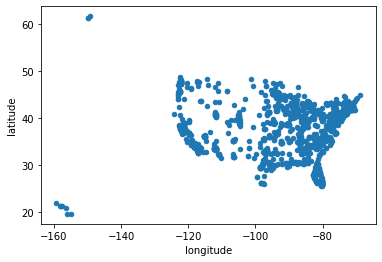

In [ ]:
#extrae los datos interesantes
latlong.plot.scatter( "longitude","latitude")

In [ ]:
latlong.describe()

,latitude,longitude
count,1839.000000,1839.000000
mean,37.791238,-91.986881
std,5.272299,16.108046
min,19.647855,-159.376962
25%,33.882605,-98.268828
50%,38.955432,-87.746346
75%,41.658341,-80.084833
max,61.577919,-68.742331


Para entender un poco más, nos auxiliaremos de una librería para graficar datos geográficos. Esto nos ayudara a tener un mejor entendimiento de ellos.




In [ ]:
import geopandas as gpd
import matplotlib.pyplot as plt
from shapely.geometry import Point

%matplotlib inline
# activate plot theme
import qeds
qeds.themes.mpl_style();

In [ ]:
df["Coordinates"] = list(zip(df.longitude, df.latitude))
df["Coordinates"] = df["Coordinates"].apply(Point)
df.head()

,name,latitude,longitude,address,phone,website,Coordinates
0,Alabaster,33.224225,-86.804174,"250 S Colonial Dr, Alabaster, AL 35007-4657",205-564-2608,https://www.target.com/sl/alabaster/2276,POINT (-86.80417369999999 33.2242254)
1,Bessemer,33.334550,-86.989778,"4889 Promenade Pkwy, Bessemer, AL 35022-7305",205-565-3760,https://www.target.com/sl/bessemer/2375,POINT (-86.98977789999999 33.3345501)
2,Daphne,30.602875,-87.895932,"1698 US Highway 98, Daphne, AL 36526-4252",251-621-3540,https://www.target.com/sl/daphne/1274,POINT (-87.89593169999999 30.6028747)
3,Decatur,34.560148,-86.971559,"1235 Point Mallard Pkwy SE, Decatur, AL 35601-...",256-898-3036,https://www.target.com/sl/decatur/2084,POINT (-86.9715595 34.5601477)
4,Dothan,31.266061,-85.446422,"4601 Montgomery Hwy, Dothan, AL 36303-1522",334-340-1112,https://www.target.com/sl/dothan/1468,POINT (-85.4464222 31.2660613)


In [ ]:
gdf = gpd.GeoDataFrame(df, geometry="Coordinates")
gdf.head()

,name,latitude,longitude,address,phone,website,Coordinates
0,Alabaster,33.224225,-86.804174,"250 S Colonial Dr, Alabaster, AL 35007-4657",205-564-2608,https://www.target.com/sl/alabaster/2276,POINT (-86.80417 33.22423)
1,Bessemer,33.334550,-86.989778,"4889 Promenade Pkwy, Bessemer, AL 35022-7305",205-565-3760,https://www.target.com/sl/bessemer/2375,POINT (-86.98978 33.33455)
2,Daphne,30.602875,-87.895932,"1698 US Highway 98, Daphne, AL 36526-4252",251-621-3540,https://www.target.com/sl/daphne/1274,POINT (-87.89593 30.60287)
3,Decatur,34.560148,-86.971559,"1235 Point Mallard Pkwy SE, Decatur, AL 35601-...",256-898-3036,https://www.target.com/sl/decatur/2084,POINT (-86.97156 34.56015)
4,Dothan,31.266061,-85.446422,"4601 Montgomery Hwy, Dothan, AL 36303-1522",334-340-1112,https://www.target.com/sl/dothan/1468,POINT (-85.44642 31.26606)


In [ ]:
len(gdf['name'].unique().tolist())

1737

In [ ]:
#mapa
world = gpd.read_file(gpd.datasets.get_path("naturalearth_lowres"))
world = world.set_index("iso_a3")
world.head()

,pop_est,continent,name,gdp_md_est,geometry
iso_a3,,,,,
FJI,920938,Oceania,Fiji,8374.0,"MULTIPOLYGON (((180.00000 -16.06713, 180.00000..."
TZA,53950935,Africa,Tanzania,150600.0,"POLYGON ((33.90371 -0.95000, 34.07262 -1.05982..."
ESH,603253,Africa,W. Sahara,906.5,"POLYGON ((-8.66559 27.65643, -8.66512 27.58948..."
CAN,35623680,North America,Canada,1674000.0,"MULTIPOLYGON (((-122.84000 49.00000, -122.9742..."
USA,326625791,North America,United States of America,18560000.0,"MULTIPOLYGON (((-122.84000 49.00000, -120.0000..."


In [ ]:
#graficar el mapa
world.name.unique()

array(['Fiji', 'Tanzania', 'W. Sahara', 'Canada',
       'United States of America', 'Kazakhstan', 'Uzbekistan',
       'Papua New Guinea', 'Indonesia', 'Argentina', 'Chile',
       'Dem. Rep. Congo', 'Somalia', 'Kenya', 'Sudan', 'Chad', 'Haiti',
       'Dominican Rep.', 'Russia', 'Bahamas', 'Falkland Is.', 'Norway',
       'Greenland', 'Fr. S. Antarctic Lands', 'Timor-Leste',
       'South Africa', 'Lesotho', 'Mexico', 'Uruguay', 'Brazil',
       'Bolivia', 'Peru', 'Colombia', 'Panama', 'Costa Rica', 'Nicaragua',
       'Honduras', 'El Salvador', 'Guatemala', 'Belize', 'Venezuela',
       'Guyana', 'Suriname', 'France', 'Ecuador', 'Puerto Rico',
       'Jamaica', 'Cuba', 'Zimbabwe', 'Botswana', 'Namibia', 'Senegal',
       'Mali', 'Mauritania', 'Benin', 'Niger', 'Nigeria', 'Cameroon',
       'Togo', 'Ghana', "Côte d'Ivoire", 'Guinea', 'Guinea-Bissau',
       'Liberia', 'Sierra Leone', 'Burkina Faso', 'Central African Rep.',
       'Congo', 'Gabon', 'Eq. Guinea', 'Zambia', 'Malawi', 'M

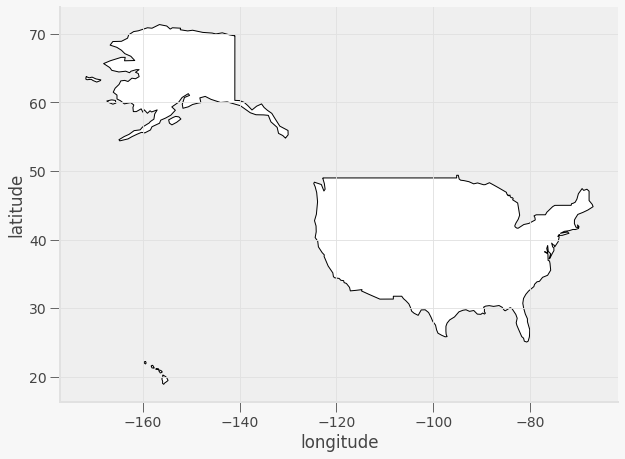

In [ ]:
fig, gax = plt.subplots(figsize=(10,10))

# By only plotting rows in which the continent is 'South America' we only plot SA.
world.query("name == 'United States of America'").plot(ax=gax, edgecolor='black',color='white')

# By the way, if you haven't read the book 'longitude' by Dava Sobel, you should...
gax.set_xlabel('longitude')
gax.set_ylabel('latitude')

gax.spines['top'].set_visible(False)
gax.spines['right'].set_visible(False)

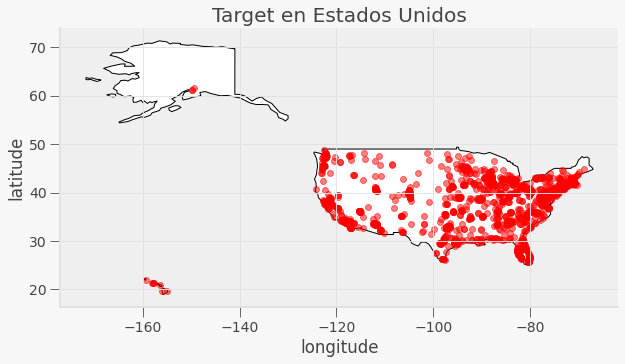

In [ ]:
# Step 3: Plot the cities onto the map
# We mostly use the code from before --- we still want the country borders plotted --- and we
# add a command to plot the cities
fig, gax = plt.subplots(figsize=(10,10))

# By only plotting rows in which the continent is 'South America' we only plot, well,
# South America.
world.query("name == 'United States of America'").plot(ax = gax, edgecolor='black', color='white')

# This plot the cities. It's the same syntax, but we are plotting from a different GeoDataFrame.
# I want the cities as pale red dots.
gdf.plot(ax=gax, color='red', alpha = 0.5)

gax.set_xlabel('longitude')
gax.set_ylabel('latitude')
gax.set_title('Target en Estados Unidos')

gax.spines['top'].set_visible(False)
gax.spines['right'].set_visible(False)

plt.show()

¿qué tal ahora?, tiene mayor sentido verdad, entonces los datos lejanos no eran atípicos, de aquí la importancia de ver los datos con el tipo de gráfica correcta.

Ahora sí, implementa K means a los datos de latitud y longitud :) y encuentra donde colocar los almacenes. 

Nota: si te llama la atención implementar alguna otra visualización con otra librería, lo puedes hacer, no hay restricciones.

# Desarrollo

In [ ]:
from sklearn.cluster import KMeans
from sklearn.metrics import pairwise_distances_argmin_min 
import seaborn as sns

In [ ]:
df.head()

,name,latitude,longitude,address,phone,website,Coordinates
0,Alabaster,33.224225,-86.804174,"250 S Colonial Dr, Alabaster, AL 35007-4657",205-564-2608,https://www.target.com/sl/alabaster/2276,POINT (-86.80417 33.22423)
1,Bessemer,33.334550,-86.989778,"4889 Promenade Pkwy, Bessemer, AL 35022-7305",205-565-3760,https://www.target.com/sl/bessemer/2375,POINT (-86.98978 33.33455)
2,Daphne,30.602875,-87.895932,"1698 US Highway 98, Daphne, AL 36526-4252",251-621-3540,https://www.target.com/sl/daphne/1274,POINT (-87.89593 30.60287)
3,Decatur,34.560148,-86.971559,"1235 Point Mallard Pkwy SE, Decatur, AL 35601-...",256-898-3036,https://www.target.com/sl/decatur/2084,POINT (-86.97156 34.56015)
4,Dothan,31.266061,-85.446422,"4601 Montgomery Hwy, Dothan, AL 36303-1522",334-340-1112,https://www.target.com/sl/dothan/1468,POINT (-85.44642 31.26606)


In [ ]:
values = df[['latitude', 'longitude']]

wcss_store = [] 
for i in range(1, 11): 
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(values) 
    wcss_store.append(kmeans.inertia_)

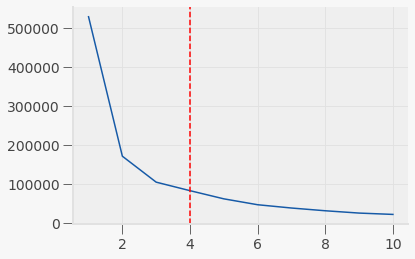

In [ ]:
clusters_store = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
plt.plot(clusters_store, wcss_store)
plt.axvline(4, linestyle='--', color='r')

In [ ]:
kmeans_store = KMeans(n_clusters=4, random_state=42)
kmeans_store.fit(values)
centroides = kmeans_store.cluster_centers_

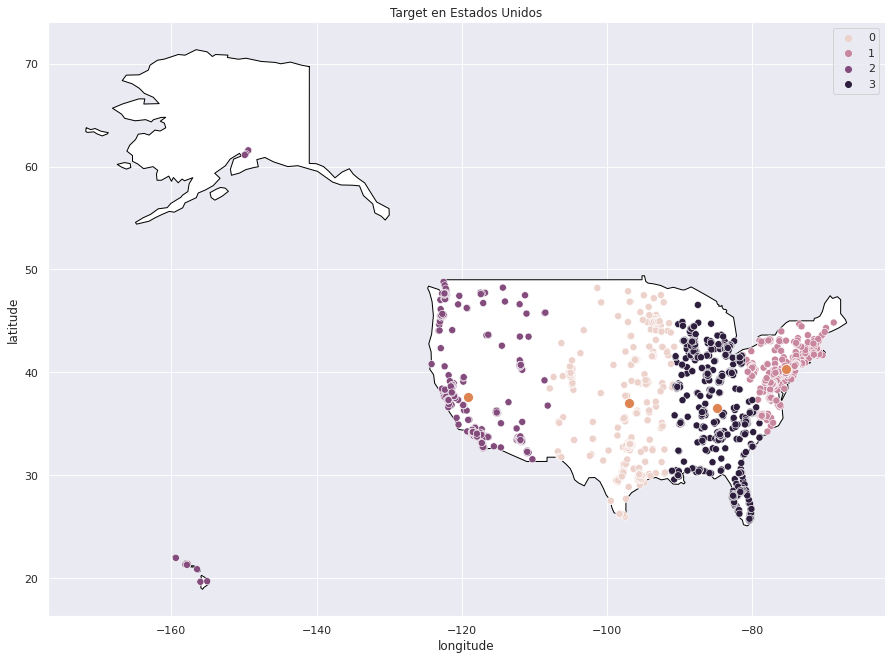

In [ ]:
fig, gax = plt.subplots(figsize=(15,15))

# By only plotting rows in which the continent is 'South America' we only plot, well,
# South America.
world.query("name == 'United States of America'").plot(ax = gax, edgecolor='black', color='white')

# This plot the cities. It's the same syntax, but we are plotting from a different GeoDataFrame.
# I want the cities as pale red dots.
gax.set_xlabel('longitude')
gax.set_ylabel('latitude')
gax.set_title('Target en Estados Unidos')

gax.spines['top'].set_visible(False)
gax.spines['right'].set_visible(False)

sns.scatterplot(x = values['longitude'], y = values['latitude'], hue=kmeans_store.labels_, s = 50)
sns.scatterplot(x = centroides[:,1], y = centroides[:,0], s=100)

plt.show()

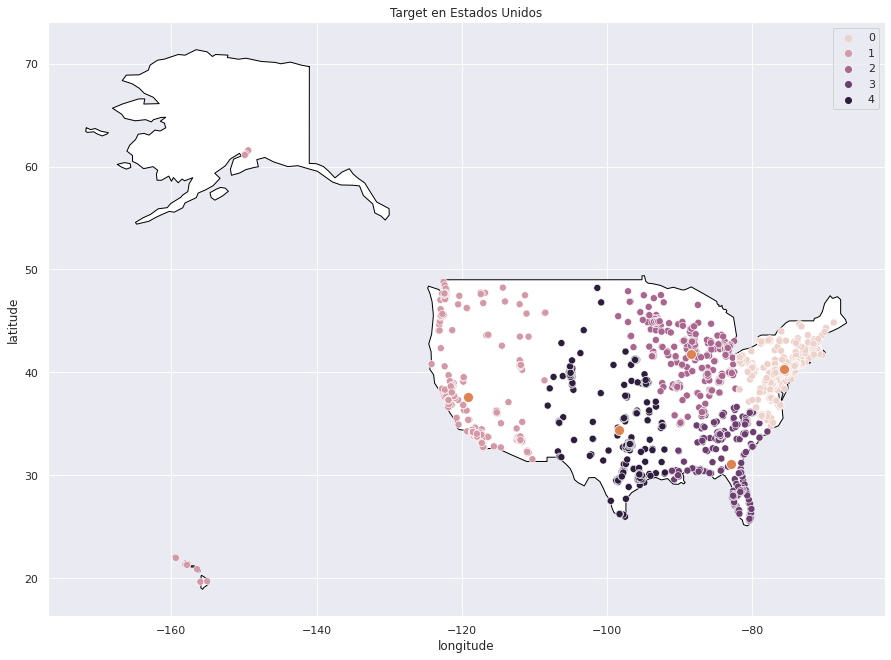

In [ ]:
fig, gax = plt.subplots(figsize=(15,15))

# By only plotting rows in which the continent is 'South America' we only plot, well,
# South America.
world.query("name == 'United States of America'").plot(ax = gax, edgecolor='black', color='white')

# This plot the cities. It's the same syntax, but we are plotting from a different GeoDataFrame.
# I want the cities as pale red dots.
gax.set_xlabel('longitude')
gax.set_ylabel('latitude')
gax.set_title('Target en Estados Unidos')

gax.spines['top'].set_visible(False)
gax.spines['right'].set_visible(False)

sns.scatterplot(x = values['longitude'], y = values['latitude'], hue=kmeans_store.labels_, s = 50)
sns.scatterplot(x = centroides[:,1], y = centroides[:,0], s=100)

plt.show()

1.   Encuentra las latitudes y longitudes de los almacenes.
2.   ¿Qué ciudad es?
3.   ¿a cuantas tiendas va surtir?
4.   ¿sabes a que distancia estará?
5.   ¿Cómo elegiste el número de almacenes?

Justifica tu respuesta técnicamente.

1.   Encuentra las latitudes y longitudes de los almacenes.

In [ ]:
### estas son las ubicaciones de los almacenes
pd.DataFrame(centroides, columns = ['latitud','longitud'], index = ['Cluster 0','Cluster 1','Cluster 2','Cluster 3','Cluster 4'])

,latitud,longitud
Cluster 0,40.343655,-75.585080
Cluster 1,37.579774,-119.176343
Cluster 2,41.759636,-88.354978
Cluster 3,31.103912,-82.933092
Cluster 4,34.420357,-98.266337


2.   ¿Qué ciudad es?


In [ ]:
from geopy.geocoders import Nominatim

geoLoc = Nominatim(user_agent = 'GetLoc')

locname1 = geoLoc.reverse("40.343655	-75.585080")
locname2 = geoLoc.reverse("37.579774	-119.176343")
locname3 = geoLoc.reverse("41.759636	-88.354978")
locname4 = geoLoc.reverse("31.103912	-82.933092")
locname5 = geoLoc.reverse("34.420357	-98.266337")

print("Ciudades donde estarán los almacenes:")
print('cluster 0:', locname1.address)
print('cluster 1:', locname2.address)
print('cluster 2:', locname3.address)
print('cluster 3:', locname4.address)
print('cluster 4:', locname5.address)

Ciudades donde estarán los almacenes:
cluster 0: Congo Road, Congo, Douglass Township, Montgomery County, Pennsylvania, 19525, United States
cluster 1: Iron Lake Trail, Madera County, California, United States
cluster 2: 129, South Western Avenue, Aurora, Aurora Township, Kane County, Illinois, 60506, United States
cluster 3: Foyd Lee Loop, Clinch County, Georgia, United States
cluster 4: County Road E1790, Cotton County, Oklahoma, United States


3.   ¿a cuantas tiendas va surtir?

In [ ]:
## Al parecer el almacen del sur-este es el que menos tiendas va abastecer
## claro está que no se conoce el número de ventas para el tamaño que deberían tener cada uno 
df['Cluster'] = kmeans_store.labels_
df['Cluster'].value_counts()

0    480
2    422
1    368
4    296
3    273
Name: Cluster, dtype: int64

4.   ¿sabes a que distancia estará?


In [ ]:
from geopy import distance
dst1 = (40.343655	-75.585080)
dst2 = (37.579774	-119.176343)
dst3 = (41.759636	-88.354978)
dst4 = (31.103912	-82.933092)
dst5 = (34.420357	-98.266337)

In [ ]:
## las distancias entre los almacenes son las siguientes
## es adecuado considerarlo para el abastecimiento incluso entre ellos
## cuando ciertos productos llegan de otros lugares del sur o de muy lejos en el 
## norte, este o oeste, dado que USA es una nación grande.
print('distancias ciudad 1')
print(distance.great_circle(dst1,dst2))
print(distance.great_circle(dst1,dst3))
print(distance.great_circle(dst1,dst4))
print(distance.great_circle(dst1,dst5))
print('\ndistancias ciudad 2')
print(distance.great_circle(dst2,dst3))
print(distance.great_circle(dst2,dst4))
print(distance.great_circle(dst2,dst5))
print('\ndistancias ciudad 3')
print(distance.great_circle(dst3,dst4))
print(distance.great_circle(dst3,dst5))
print('\ndistancias ciudad 4')
print(distance.great_circle(dst4,dst5))

distancias ciudad 1
5154.464118126949 km
1262.49975141252 km
1844.476806021374 km
3180.685888118236 km

distancias ciudad 2
3891.96436671443 km
3309.9873121055757 km
1973.7782300087126 km

distancias ciudad 3
581.977054608854 km
1918.1861367057172 km

distancias ciudad 4
1336.2090820968629 km


5.   ¿Cómo elegiste el número de almacenes?

El número óptimo de conglomerados resultó ser 4, pero se tomaron 5. Graficando el segundo resultado, se puede observar que, en comparación con el primer resultado, permite separar las tiendas cercanas a la tienda de Nueva York, un poco más al norte, lo que permite enfocarse en el noreste y sureste, también porque en la costa de EE.UU. hay más gente, y el centro tendrá un almacén que abastece a los lugares con menor población. En última instancia, West solo ofrecerá un almacén, ya que parece estar concentrado en California.

Se puede bajar a 4 si es caro, o subir a más de 5 si es más barato o más beneficioso para reducir costes y mejorar la atención.

¿qué librerías nos pueden ayudar a graficar este tipo de datos?

Geopandas: tratamiendo y manejo de datos espaciales.

geopy: permite encontrar ubicaciones con geocodificadores de tercers y otras fuentes de datos.

Cartopy: Permite dibujar y realizar análisis de datos y visualizaciones.

GeoViews: nos permite realizar mapas interactivos.

Folium: permite interactuar con Leaflet.

Gdal: permite trabajar con datos vectoriales y raster.


¿Consideras importante que se grafique en un mapa?, ¿por qué?

Es importante poder mostrar los puntos relacionados con la tienda, poder medir cómo están distribuidos y evaluar cómo agruparlos para comprobar la mejor ubicación para mantener la mejor distancia de todos los puntos.
Ver cómo se generan estos grupos te dará algunas ideas e incluso se pueden complementar con características adicionales como ingresos, costos, consumo de diferentes productos.

Agrega las conclusiones

Este es un análisis interesante, pero es solo una ligera idea, porque al final hay que tener en cuenta la logística de la ruta más corta, las conexiones existentes y otras variables, quizás hasta el clima, porque en EE.UU. hay un conjunto de fenómenos que requieren profundizar en la investigación.
También se requiere un análisis de costo-beneficio para comprender qué tan grande debe ser el almacén según las tiendas que se almacenarán, qué infraestructura dependerá de los productos que más necesiten los clientes y otras posibles limitaciones. La toma de decisiones a través de análisis gráficos permite a las partes interesadas comprender mejor los conocimientos.